In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [5]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

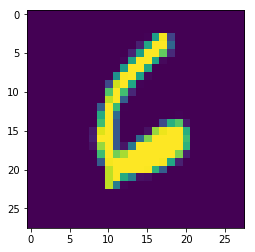

In [13]:
plt.imshow(mnist.train.images[3].reshape(28,28))

In [14]:
mnist.train.num_examples

55000

In [15]:
mnist.test.num_examples

10000

In [16]:
mnist.validation.num_examples

5000

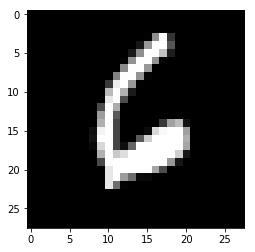

In [17]:
plt.imshow(mnist.train.images[3].reshape(28,28),cmap='gist_gray')

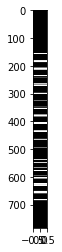

In [19]:
plt.imshow(mnist.train.images[1].reshape(784,1),cmap='gist_gray',aspect=0.02)

In [20]:
x = tf.placeholder(tf.float32, shape=[None, 784])

In [25]:
W = tf.Variable(tf.zeros([784,10]))

In [26]:
b = tf.Variable(tf.zeros([10]))

In [27]:
y = tf.matmul(x,W) + b

In [28]:
y_true = tf.placeholder(tf.float32, shape=[None, 10])

In [29]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true, logits=y))

In [30]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)

In [31]:
train = optimizer.minimize(cross_entropy)

In [32]:
init = tf.global_variables_initializer()

In [36]:
with tf.Session() as sess:
    sess.run(init)
    
    # Train the model for 1000 steps on the training set
    # Using built in batch feeder from mnist for convenience
    
    for step in range(1000):
        batch_x, batch_y = mnist.train.next_batch(100)
        sess.run(train, feed_dict={x:batch_x, y_true:batch_y})
    
    # Test the Model
    matches = tf.equal(tf.argmax(y,1), tf.argmax(y_true, 1))
    accuracy = tf.reduce_mean(tf.cast(matches, tf.float32))
    print(sess.run(accuracy, feed_dict={x:mnist.test.images, y_true:mnist.test.labels}))

0.9181
